<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Gold_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Importing all the required libraries and functions into the program.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [4]:
#Importing the file and converting it into a dataframe.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gld_price_data.csv")

In [5]:
#Returning the first 3 rows in the dataframe.
df.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [6]:
#Getting an idea of the number of rows and columns in the dataframe.
df.shape

(2290, 6)

In [7]:
#Getting a statistical summary of the entire dataframe.
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#Checking the datatypes of the feature columns in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#Checking if any column in the dataframe contains any null value.
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
#Calculating the correlation coefficient amoongst the features.
correlation = df.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


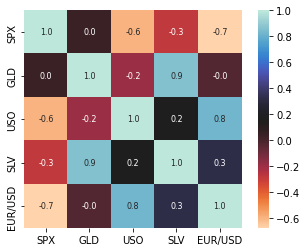

In [27]:
#Plotting a heatmap to visualize the correlation table created above.
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap = "icefire_r")

In [33]:
#Checking the correlating numbers for label values against other features.
print(correlation['GLD'].sort_values(ascending = False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


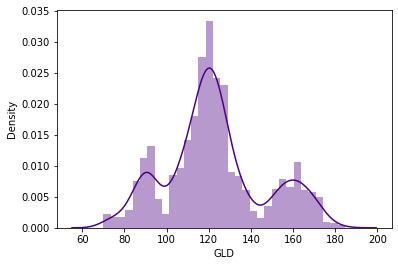

In [38]:
#plotting the spread and frequency of the label values.
sns.distplot(df["GLD"], color = 'Indigo')

In [43]:
#Dropping unwanted features/columns before splitting the dataframe into training and test data.
df_dropped = df.drop("Date", axis = 1)
feature = df_dropped.drop("GLD", axis = 1)
label = df["GLD"]

In [44]:
#Checking the shape of the resultant dataframe after dropping features/columns.
print(feature.shape)
print(label.shape)

(2290, 4)
(2290,)


In [45]:
#Splitting the dataframe into traininng and testing dataframe.
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size= 0.1, random_state= 1)

In [46]:
#Checking the shape of the resultant child dataframes.
print(feature_train.shape)
print(feature_test.shape)
print(label_train.shape)
print(label_test.shape)

(2061, 4)
(229, 4)
(2061,)
(229,)


In [49]:
#Selecting the type of model for supervised learning application, and training the model.
model = RandomForestRegressor(n_estimators= 100)
model.fit(feature_train, label_train)

RandomForestRegressor()

In [55]:
#Runnning the model on training data and calculating accuracy.
predict_train = model.predict(feature_train)
train_accuracy = metrics.r2_score(label_train, predict_train)
print(round(train_accuracy,2))

1.0


In [54]:
#Runnning the model on test data and calculating accuracy.
predict_test = model.predict(feature_test)
test_accuracy = metrics.r2_score(label_test, predict_test)
print(round(test_accuracy,2))

0.99


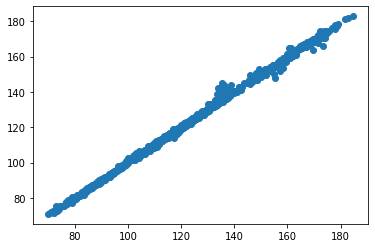

In [56]:
#Generating a scatterplot for training data (for actual vs predicted values).
plt.scatter(label_train, predict_train)

In [57]:
#Converting label into a list for further plotting purpose.
label_train_list = list(label_train)

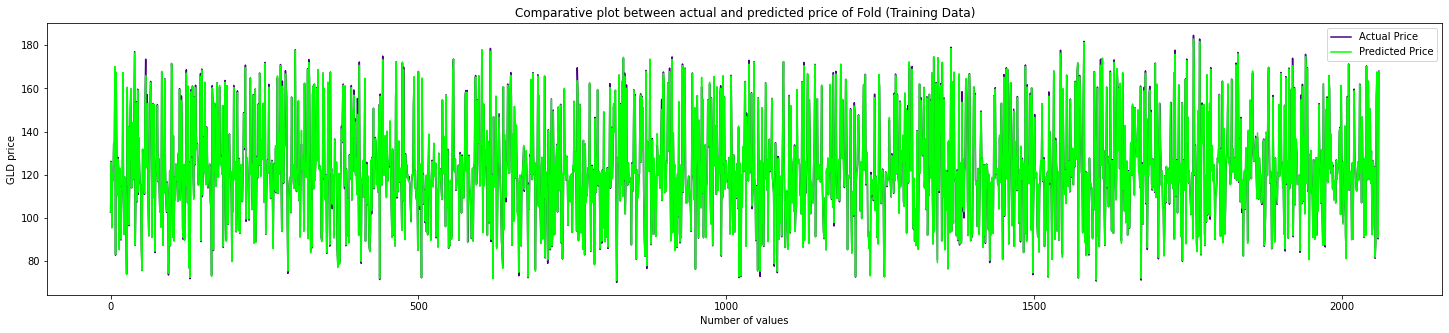

In [61]:
#Plotting the actual vs predicted data by the model to check the accuracy of the model visually.
plt.figure(figsize= (25,5))
plt.plot(label_train_list, color = "Indigo", label = "Actual Price")
plt.plot(predict_train, color = "Lime", label = "Predicted Price")
plt.title("Comparative plot between actual and predicted price of Fold (Training Data)")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()